# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## 1 Region and Domain
* Ann Arbor, Michigan, United States
* Weather Phenomena

## 2 Research Question
* Which months had the most comfortable weather in Ann Arbor, MI?
* How was Ann Arbor, MI's weather different from other Michigan cities?

## Data
The main dataset includes weather data for three main cities in Michigan: Ann Arbor, Detroit, and Grand Rapids. Not all weather parameters were collected for all cities. CLDD was collected for Ann Arbor only, while PSUN, TSUN were collected for Detroit and Grand Rapids only. The weather measurements were taken at the city's airport station, i.e. ANN ARBOR MUNICIPAL AIRPORT, DETROIT METRO AIRPORT, and GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPORT. 

Here is the data dictionary:
* AWND – Monthly Average Wind Speed in mile per hour
* CLDD – Cooling Degree Days. Computed when daily average temperature is more than 65 &deg;F. CDD = mean daily temperature - 65 degrees Fahrenheit/18.3 degrees Celsius. Each day is summed to produce a monthly total. 
* PRCP – Total Monthly Precipitation in inches
* PSUN – Monthly Average of the daily percents of possible sunshine
* SNOW – Total Monthly Snowfall in inches
* TAVG – Average Monthly Temperature in &deg;F
* TMAX – Monthly Maximum Temperature in &deg;F
* TMIN – Monthly Maximum Temperature in &deg;F
* TSUN – Monthly total sunshine in minutes

Data source:
* NOAA Data Source: https://www.ncdc.noaa.gov/cdo-web/ 
* NOAA Data Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GSOM_documentation.pdf

<IPython.core.display.Javascript object>


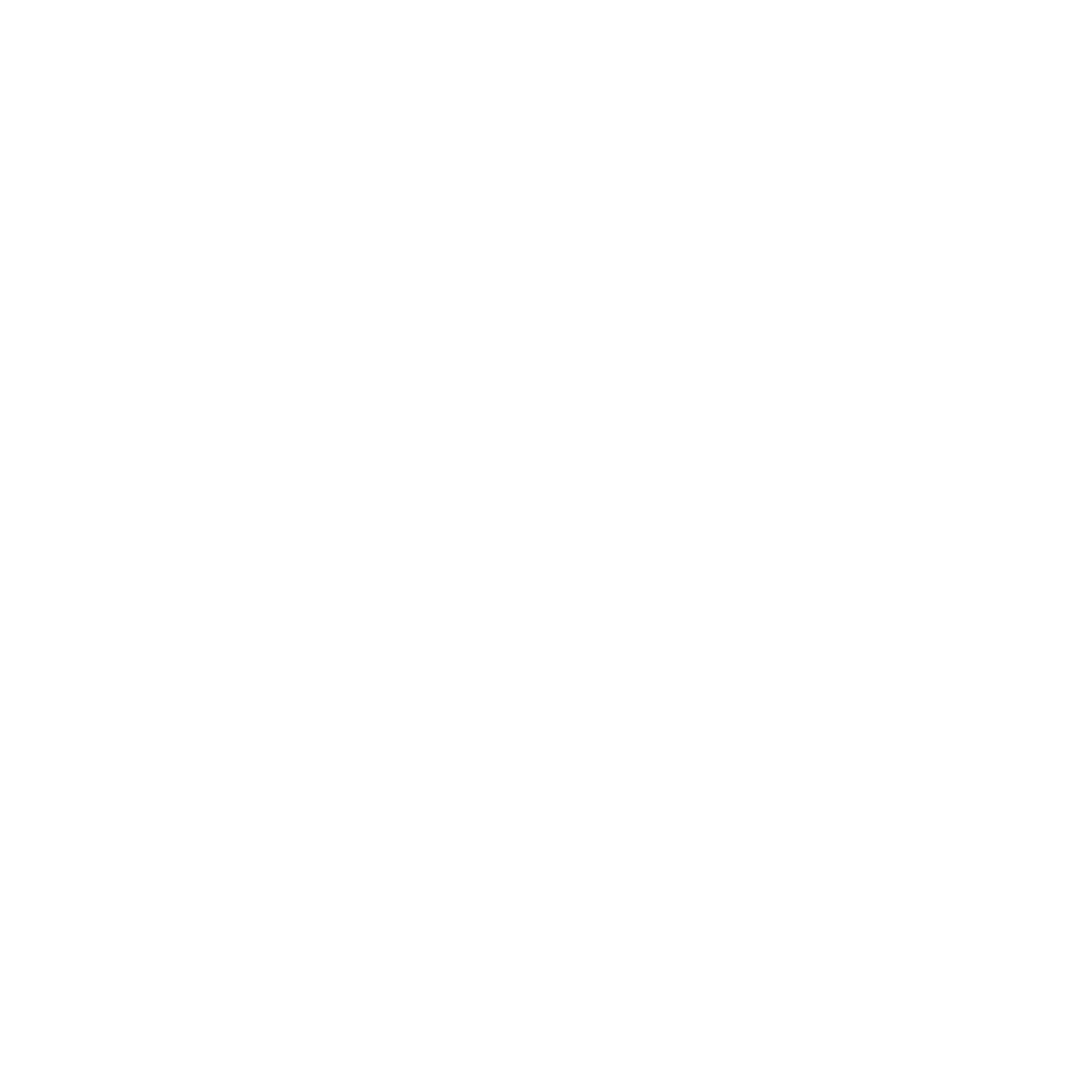

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import mplleaflet
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sbn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


df = pd.read_csv('2124197.csv')
df.head()
lons = df['LONGITUDE'].tolist()
lats = df['LATITUDE'].tolist()

fig = plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200);
mplleaflet.display(fig)
# mplleaflet.show()

In [2]:
df.shape
df.groupby(['STATION', 'NAME']).size()

(360, 15)

STATION      NAME                                                   
USW00094847  DETROIT METRO AIRPORT, MI US                               120
USW00094860  GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPORT, MI US    120
USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US                         120
dtype: int64

In [3]:
df.describe()

#Snow data for Ann Arbor is missing
df.groupby('NAME')['SNOW'].count()
df.groupby(['NAME', df['SNOW'].isna()]).size()

,LATITUDE,LONGITUDE,ELEVATION,AWND,CDSD,PRCP,PSUN,SNOW,TAVG,TMAX,TMIN,TSUN
count,360.000000,360.000000,360.000000,358.000000,360.000000,358.000000,95.000000,240.000000,360.000000,360.000000,360.000000,95.000000
mean,42.445527,-84.199710,230.933333,8.345251,383.338889,2.982598,46.691579,5.097083,49.748611,59.233611,40.266944,11035.768421
std,0.309436,0.952767,27.716471,1.629032,379.031741,1.747091,19.363239,9.118634,17.800851,19.209313,16.552592,5815.940327
min,42.222780,-85.523890,192.300000,4.700000,0.000000,0.240000,8.900000,0.000000,10.100000,22.100000,-1.900000,1516.000000
25%,42.222780,-85.523890,192.300000,7.200000,0.000000,1.745000,34.500000,0.000000,33.775000,41.100000,26.050000,6228.000000
50%,42.231300,-83.744440,244.800000,8.300000,306.500000,2.640000,48.300000,0.000000,50.700000,60.750000,39.850000,11324.000000
75%,42.882500,-83.330800,255.700000,9.600000,695.500000,3.800000,63.100000,6.750000,66.725000,77.500000,55.525000,16409.500000
max,42.882500,-83.330800,255.700000,12.300000,1206.000000,11.100000,79.800000,41.900000,79.300000,91.100000,69.300000,21787.000000


NAME
ANN ARBOR MUNICIPAL AIRPORT, MI US                           0
DETROIT METRO AIRPORT, MI US                               120
GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPORT, MI US    120
Name: SNOW, dtype: int64

NAME                                                     SNOW 
ANN ARBOR MUNICIPAL AIRPORT, MI US                       True     120
DETROIT METRO AIRPORT, MI US                             False    120
GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPORT, MI US  False    120
dtype: int64

In [4]:
#Load Ann Arbor Snow data
snow = pd.read_csv('2124901.csv')
snow.describe()
snow.head()
print('Only {} ({:.2%}) of data have SNOW values'.format(snow['SNOW'].count(), snow['SNOW'].count()/len(snow)))
print('Snow depth varies bewteen {} and {} inches, with a mean depth of {:.2} inches'\
      .format(snow['SNOW'].min(), snow['SNOW'].max(), snow['SNOW'].mean()))
snow[snow['SNOW'].isna()==False].groupby('DATE').size() # Have data for all 120 months

,LATITUDE,LONGITUDE,ELEVATION,CLDD,DSND,DSNW,EMSD,EMSN,EMXP,PRCP,SNOW
count,2195.000000,2195.000000,2195.000000,1043.000000,726.000000,825.000000,726.000000,825.000000,2050.000000,2173.000000,825.000000
mean,42.267752,-83.729427,254.842369,59.944391,5.976584,1.483636,2.768595,1.775394,0.990283,2.965601,4.527636
std,0.093631,0.126428,22.145339,91.129428,8.859252,2.308182,4.101661,2.567797,0.600137,1.627112,7.034614
min,42.081100,-84.030250,207.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000
25%,42.222780,-83.810940,247.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590000,1.770000,0.000000
50%,42.283233,-83.744440,255.700000,1.000000,0.000000,0.000000,0.000000,0.200000,0.875000,2.650000,0.300000
75%,42.326300,-83.663880,274.300000,100.500000,10.000000,2.000000,5.000000,3.000000,1.247500,3.840000,7.000000
max,42.488603,-83.472130,298.700000,459.000000,31.000000,11.000000,21.000000,12.700000,6.150000,9.590000,37.800000


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CLDD,DSND,DSNW,EMSD,EMSN,EMXP,PRCP,SNOW
0,US1MIWS0020,"ANN ARBOR 1.7 NNW, MI US",42.29982,-83.739201,257.3,2012-11,NaN,NaN,NaN,NaN,NaN,NaN,0.92,NaN
1,US1MIWS0020,"ANN ARBOR 1.7 NNW, MI US",42.29982,-83.739201,257.3,2012-12,NaN,NaN,NaN,NaN,NaN,0.97,2.87,NaN
2,US1MIWS0020,"ANN ARBOR 1.7 NNW, MI US",42.29982,-83.739201,257.3,2013-01,NaN,NaN,NaN,NaN,NaN,0.98,3.83,NaN
3,US1MIWS0020,"ANN ARBOR 1.7 NNW, MI US",42.29982,-83.739201,257.3,2013-02,NaN,NaN,6.0,NaN,5.0,0.90,2.13,14.6
4,US1MIWS0020,"ANN ARBOR 1.7 NNW, MI US",42.29982,-83.739201,257.3,2013-04,NaN,NaN,NaN,NaN,NaN,1.66,6.19,NaN


Only 825 (37.59%) of data have SNOW values
Snow depth varies bewteen 0.0 and 37.8 inches, with a mean depth of 4.5 inches


DATE
2010-01    12
2010-02    11
2010-03    10
2010-04     9
2010-05     9
           ..
2019-08     8
2019-09     8
2019-10     9
2019-11     9
2019-12    11
Length: 120, dtype: int64

In [5]:
# Get mean snow level and CLDD per month regardless of station
snow_mean = snow.groupby('DATE').agg(SNOW=('SNOW', np.mean),
                         CLDD=('CLDD', 'min'))

snow_mean.head(); snow_mean.tail()
#Fill in missing snow data in df with snow_mean
df['CLDD']=None
df.loc[df['NAME']=='ANN ARBOR MUNICIPAL AIRPORT, MI US',['SNOW', 'CLDD']] =snow_mean.iloc[:,:].values
df.loc[df['NAME']=='ANN ARBOR MUNICIPAL AIRPORT, MI US',['SNOW', 'CLDD']] 

,SNOW,CLDD
DATE,,
2010-01,6.991667,0.0
2010-02,24.154545,0.0
2010-03,0.000000,0.0
2010-04,0.000000,0.0
2010-05,0.000000,43.0


,SNOW,CLDD
DATE,,
2019-08,0.000000,101.0
2019-09,0.000000,35.0
2019-10,0.000000,7.0
2019-11,9.500000,0.0
2019-12,2.163636,0.0


,SNOW,CLDD
120,6.991667,0
121,24.154545,0
122,0.000000,0
123,0.000000,0
124,0.000000,43
...,...,...
235,0.000000,101
236,0.000000,35
237,0.000000,7
238,9.500000,0


In [6]:
#Map citi name to airport name
cities = pd.DataFrame({'Airport': sorted(set(df['NAME'])), 'City': ['Ann Arbor', 'Detroit', 'Grand Rapids']})
cities

df = df.merge(cities, how='left', left_on='NAME', right_on='Airport')
df.drop('Airport', axis=1, inplace=True)
df[['City', 'NAME']].drop_duplicates()

,Airport,City
0,"ANN ARBOR MUNICIPAL AIRPORT, MI US",Ann Arbor
1,"DETROIT METRO AIRPORT, MI US",Detroit
2,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,Grand Rapids


,City,NAME
0,Grand Rapids,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...
120,Ann Arbor,"ANN ARBOR MUNICIPAL AIRPORT, MI US"
240,Detroit,"DETROIT METRO AIRPORT, MI US"


In [7]:
#Extract month name from Date
df['dt'] = pd.to_datetime(df['DATE'], yearfirst=True)
df['Month'] = pd.DatetimeIndex(df['dt']).strftime('%b') #Same as: df['Month'] = df['dt'].apply(lambda x: x.strftime('%b'))
df['Month_Num'] = df['dt'].dt.month

#Set index
# df.set_index(['City', 'dt'], drop=False, inplace=True)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,PRCP,PSUN,SNOW,TAVG,TMAX,TMIN,TSUN,CLDD,City,dt,Month,Month_Num
0,USW00094860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.8825,-85.52389,244.8,2010-01,10.1,0,0.85,NaN,9.3,25.1,30.1,20.0,NaN,None,Grand Rapids,2010-01-01,Jan,1
1,USW00094860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.8825,-85.52389,244.8,2010-02,8.1,0,1.81,NaN,24.8,27.2,32.2,22.1,NaN,None,Grand Rapids,2010-02-01,Feb,2
2,USW00094860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.8825,-85.52389,244.8,2010-03,7.8,0,1.17,NaN,2.0,41.2,51.8,30.6,NaN,None,Grand Rapids,2010-03-01,Mar,3
3,USW00094860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.8825,-85.52389,244.8,2010-04,10.3,11,3.81,NaN,0.0,53.7,65.7,41.6,NaN,None,Grand Rapids,2010-04-01,Apr,4
4,USW00094860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.8825,-85.52389,244.8,2010-05,8.7,102,3.80,NaN,0.0,61.6,71.2,51.9,NaN,None,Grand Rapids,2010-05-01,May,5


### Scatter Plots: General Impression of Weather Metrics

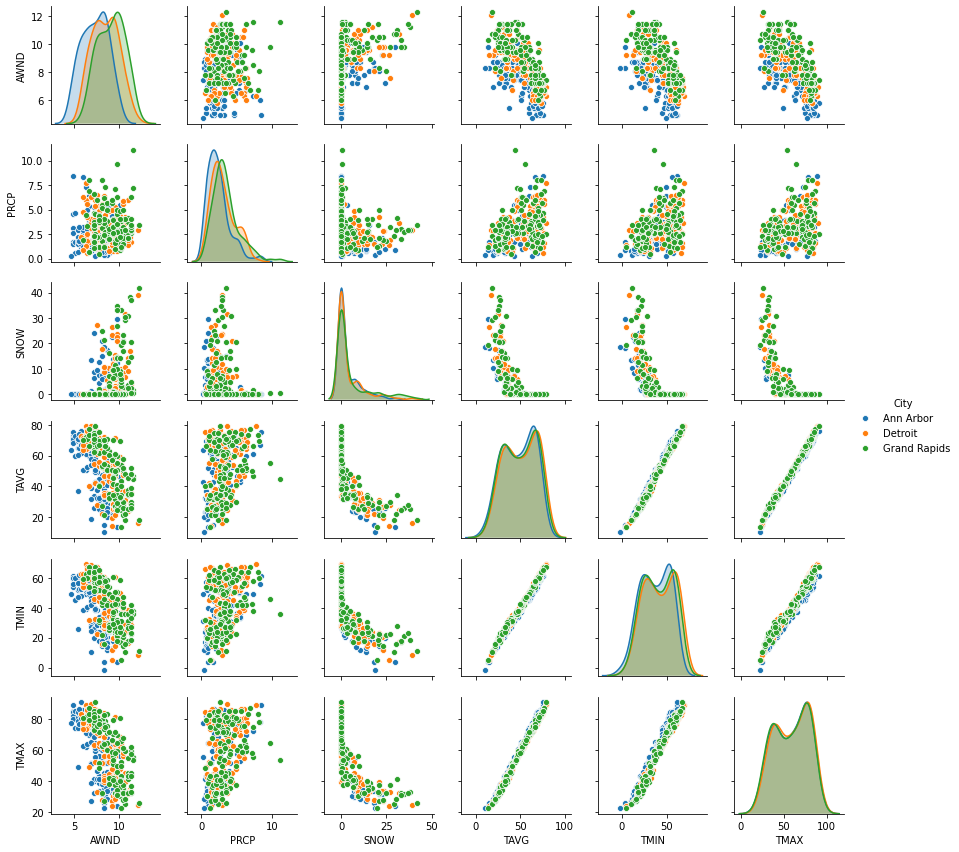

In [15]:
pairplot = sbn.pairplot(df, vars=['AWND', 'PRCP', 'SNOW', 'TAVG', 'TMIN', 'TMAX'],
                        hue='City', hue_order=['Ann Arbor', 'Detroit', 'Grand Rapids'],
                        diag_kind='kde', height=2);
fig.savefig('PairPlot.png');

import warnings
warnings.filterwarnings('ignore');

* TAVG, TMIN, TMAX were positively correlated with each other as expected. However, AWND was inversely correlated with these temperature parameters, as one would expect on a windy day the temperature tends to be lower.
* The temperature distributions had two modes at 70's and 40's &deg;F, which indicated summer and winter seasons.
* PRCP seemd to increase with temperature. We would look closer to see if it rained more often during warmer months.
* SNOW spiked at 0 inches since there would only be measurements during snowy seasons.
* Interestingly, Ann Arbor and Grand Rapids were wider apart in distributions specifically in average wind speed, and precipitation. Given their geographic locations being two-hour drive apart, it is reasonable that the weather could vary a bit between the two cities. We will conduct a hyposthesis testing for the difference in each of these parameters. 

In [9]:
#Get mean values
mean_value = (
                df.groupby(['City', 'Month_Num', 'Month'])[['AWND', 'PRCP', 'SNOW', 'TAVG', 'TMIN', 'TMAX']]
                .agg(np.mean)
                .unstack(level=0)
)

mean_value.reset_index(level=0, inplace=True)
mean_value

Month_Num      AWND                           PRCP                       \
City            Ann Arbor Detroit Grand Rapids Ann Arbor Detroit Grand Rapids   
Month                                                                           
Jan           1  8.670000   10.17    10.350000  1.266000   2.057        2.539   
Feb           2  8.550000    9.63    10.380000  1.697000   2.487        2.657   
Mar           3  8.490000    9.22     9.930000  2.145000   2.491        2.348   
Apr           4  8.840000    9.55    10.770000  3.465000   3.599        4.898   
May           5  6.980000    8.08     9.160000  3.690000   4.192        3.757   
Jun           6  6.630000    7.82     8.470000  3.081000   3.287        4.016   
Jul           7  5.540000    6.88     7.344444  3.277778   3.653        3.695   
Aug           8  5.390000    6.65     6.930000  2.220000   3.435        3.858   
Sep           9  5.788889    6.85     7.680000  2.036000   3.639        2.994   
Oct          10  7.250000    8.61     9.080000  2.524000   2.715        5.445   
Nov          11  7.920000    9.47     9.890000  2.224000   2.794        2.771   
Dec          12  7.990000    9.28     9.840000  1.574000   2.221        2.579   

            SNOW                           TAVG                       \
City   Ann Arbor Detroit Grand Rapids Ann Arbor Detroit Grand Rapids   
Month                                                                  
Jan    11.719595   14.34        21.85     23.06   25.33        24.58   
Feb    14.898371   18.35        21.93     24.59   27.49        26.09   
Mar     4.031512    5.01         5.09     35.34   37.61        35.87   
Apr     1.030881    0.87         2.53     46.88   48.90        47.43   
May     0.004000    0.00         0.00     59.69   62.32        60.73   
Jun     0.000000    0.00         0.00     66.99   70.51        69.08   
Jul     0.000000    0.00         0.00     71.60   75.56        74.04   
Aug     0.000000    0.00         0.00     69.53   73.31        71.48   
Sep     0.000000    0.00         0.00     62.53   66.26        64.59   
Oct     0.018333    0.00         0.07     50.94   54.17        52.34   
Nov     3.282528    2.88         5.98     37.87   40.86        39.65   
Dec     7.344026    8.53        14.90     30.04   32.41        31.28   

           TMIN                           TMAX                       
City  Ann Arbor Detroit Grand Rapids Ann Arbor Detroit Grand Rapids  
Month                                                                
Jan       14.78   18.44        18.23     31.36   32.23        30.93  
Feb       15.31   20.04        18.86     33.88   34.97        33.30  
Mar       25.31   28.85        26.95     45.36   46.41        44.81  
Apr       35.20   38.80        37.13     58.57   58.96        57.71  
May       47.39   52.13        50.25     71.95   72.53        71.20  
Jun       54.74   60.72        58.83     79.24   80.28        79.34  
Jul       58.44   65.75        63.67     84.76   85.36        84.38  
Aug       56.94   63.91        61.41     82.14   82.74        81.55  
Sep       50.08   56.97        54.40     74.99   75.53        74.79  
Oct       39.47   45.32        43.07     62.42   63.04        61.60  
Nov       28.06   33.05        32.18     47.70   48.65        47.13  
Dec       22.77   26.48        25.68     37.29   38.41        36.90

### Monthly Weather in Ann Arbor, MI

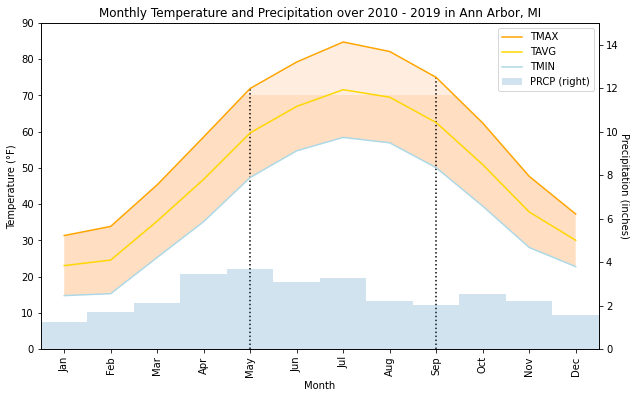

In [14]:
#Ann Arbor only
aa = mean_value.loc[:, pd.IndexSlice[:, 'Ann Arbor']].droplevel(axis=1, level=1)
aa = aa[['TMAX', 'TAVG', 'TMIN', 'PRCP']]

#Get months where temp hit 70-80F
t7080 =aa.loc[~((aa['TAVG'] >80) | (aa['TMAX']<70))] #May - Sep

t7080_month_num = [i for i in range(len(aa.index)) if list(aa.index)[i] in list(t7080.index)]

#Start plotting temperature        
fig, ax = plt.subplots(1,1, figsize=(10,6))

aa.plot(use_index=True, y=['TMAX', 'TAVG', 'TMIN'],
        xlim=(0,11), ylim=(0, 90),
        xticks=range(len(aa)), rot=45, ax=ax,
       color=['Orange', 'Gold', 'LightBlue'])

ax.fill_between(aa.index, 
                aa['TMIN'], aa['TMAX'], 
                facecolor='tab:orange',
                alpha=0.25) 
ax.set_ylabel(u'Temperature (\N{DEGREE SIGN}F)')
    
#Draw rectangle that represents temperature range intersecting 70-80F    
left = t7080_month_num[0]
width = t7080_month_num[-1]-t7080_month_num[0]
height = aa['TMAX'].max()-70

rect = plt.Rectangle((left-0.2, 70), width=width+0.55, height=height,
                     facecolor="white", alpha=0.5)

ax.add_patch(rect)

#Drop vertical lines to months where temperature hit 70-80F
ax.vlines(x=t7080_month_num[0], ymin=0, ymax=t7080.iloc[0]['TMAX'], linestyles='dotted')
ax.vlines(x=t7080_month_num[-1], ymin=0, ymax=t7080.iloc[-1]['TMAX'], linestyles='dotted')


#Plot precipitation on secondary y-axis    
ax1 = aa.plot(y='PRCP', secondary_y='PRCP', kind='bar', ax=ax, sharex=True, width=1, alpha=0.2)
ax1.set_xlim(-0.5,11.5)
ax1.set_ylim(0,15)
ax1.set_ylabel('Precipitation (inches)', rotation=-90, labelpad=10)

# plt.subplots_adjust(bottom=0.25)

#Re-arrange order of legend so that TMAX is on top, TMIN is at the bottom
handles, labels = ax.get_legend_handles_labels()
handles; labels
# handles=[handles[1], handles[0], handles[2]]
# labels=[labels[1], labels[0], labels[2]]
# ax.legend(handles, labels)

ax.set_title('Monthly Temperature and Precipitation over 2010 - 2019 in Ann Arbor, MI');
fig.savefig('Ann_Arbor_Weather.png');

The best time to enjoy comfortable temeperature range 70-80&deg;F in Ann Arbor, MI was May - Sep. The warmest months also overlapped with the rainy season during Apr - Jul. So if you happen to visit the city during these months, remember to bring an umbrella with you.

### Contrast Monthly Weather between Cities

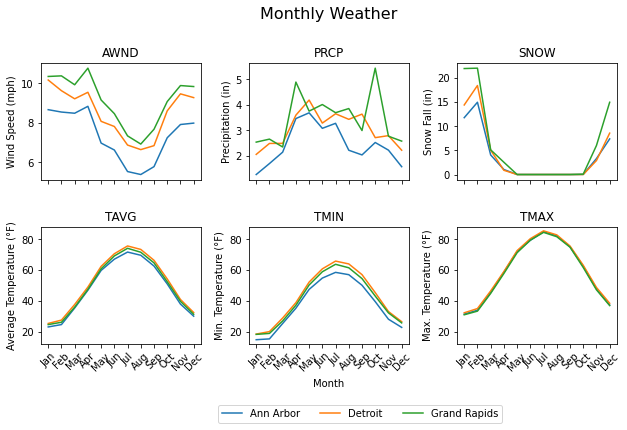

In [16]:
# Create a 2x3 grid of subplots
import matplotlib.ticker as ticker
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', figsize=(10,6))
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
col=['AWND', 'PRCP', 'SNOW', 'TAVG', 'TMIN', 'TMAX']
ylabel=['Wind Speed (mph)', 'Precipitation (in)', 'Snow Fall (in)',
        u'Average Temperature (\N{DEGREE SIGN}F)',
        u'Min. Temperature (\N{DEGREE SIGN}F)',
        u'Max. Temperature (\N{DEGREE SIGN}F)']


for i in range(len(col)):   
    mean_value.loc[:, col[i]].plot(ax=ax[i], legend=False, xticks=range(len(mean_value.index)), use_index=True, rot=45)

#     ax[i].set_xticks(range(0,len(mean_value)))
#     ax[i].set_xticklabels(mean_value.index, rotation=45)
#     xaxis = ax[i].axes.get_xaxis()
    xaxis = ax[i].xaxis
    ax[i].tick_params(axis='x', which='minor', bottom=False) #Suppress x minor ticks
    xaxis.get_label().set_visible(False)  #Suppress x-axis label
    
    ax[i].set_ylabel(ylabel[i])
    ax[i].set_title(col[i])
    
    
ax4.axis([ax5.axis()[0], ax5.axis()[1], ax5.axis()[2], ax6.axis()[3]])
ax5.axis([ax5.axis()[0], ax5.axis()[1], ax5.axis()[2], ax6.axis()[3]])
ax6.axis([ax5.axis()[0], ax5.axis()[1], ax5.axis()[2], ax6.axis()[3]])

    
fig.text(0.5, 0.1, 'Month', ha='center')
# fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')
fig.suptitle('Monthly Weather', fontsize=16)
# fig.tight_layout(pad=3.0)
plt.subplots_adjust(left=0.1, bottom=0.2, right=None, top=0.85, wspace=0.3, hspace=0.4)
fig.legend(labels = ['Ann Arbor', 'Detroit', 'Grand Rapids'], loc = 'upper center'
           , bbox_to_anchor = (0.5, 0.07), ncol=3);
fig.savefig('Contrast_Cities.png');

The three cities had similar weather patterns, with Ann Arbor showing the mildest weather. It had the lowest average wind speed, precipitation and snow fall overall. It also had the lowest temperature.

### Hypothesis Testing
Now we are going to test the differences in weather between Ann Arbor and Grand Rapids, the city shown to have the greatest departure. The test used is non-parametric Kruskal-Wallis test, which does not assume any specific shape of the distributions of the data. The only assumptions this test takes are that the samples being tested are independent and come from the same distribution. Based on the pair-plot kde's, the same distribution assumption seems valid.

H10: No difference in AWND between Ann Arbor and Grand Rapids  
H1a: Not so
    
H20: No difference in PRCP between Ann Arbor and Grand Rapids  
H2a: Not so

H30: No difference in SNOW between Ann Arbor and Grand Rapids  
H3a: Not so

H40: No difference in TAVG between Ann Arbor and Grand Rapids  
H4a: Not so

In [12]:
# Separate df by city
from scipy.stats import ttest_ind
from scipy.stats import kruskal
GR = mean_value.loc[:, pd.IndexSlice[:,'Grand Rapids']].droplevel(axis=1, level=1)
AA = mean_value.loc[:, pd.IndexSlice[:,'Ann Arbor']].droplevel(axis=1, level=1)

#Take out missing values or ttest will throw you an error
col = ['AWND', 'PRCP', 'SNOW', 'TAVG']
for i in range(len(col)):
    _GR = GR[col[i]][~np.isnan(GR[col[i]])]
    _AA = AA[col[i]][~np.isnan(AA[col[i]])]
    kruskal(_AA, _GR)
    print("Mean {}, Ann Arbor vs Grand Rapids: {:.2f} vs {:.2f}".format(col[i], np.mean(_AA), np.mean(_GR)))
    print("Median {}, Ann Arbor vs Grand Rapids: {:.2f} vs {:.2f}".format(col[i], np.nanmedian(_AA), np.nanmedian(_GR)))
    
# GR_AWND = GR['AWND'][~np.isnan(GR['AWND'])]
# AA_AWND = AA['AWND'][~np.isnan(AA['AWND'])]

# AA_AWND.count()
# AA_PRCP.count()

# ttest_ind(AA_AWND, GR_AWND)
# ttest_ind(AA_PRCP, GR_PRCP)
# kruskal(AA_AWND, GR_AWND)

# print("Mean AWND, Ann Arbor vs Grand Rapids: {:.2f} vs {:.2f}".format(np.mean(AA_AWND), np.mean(GR_AWND)))
# print("Median TAVG, Ann Arbor vs Grand Rapids: {:.2f} vs {:.2f}".format(np.nanmedian(AA_TAVG), np.nanmedian(GR_TAVG)))

KruskalResult(statistic=7.680000000000007, pvalue=0.005583616806378751)

Mean AWND, Ann Arbor vs Grand Rapids: 7.34 vs 9.15
Median AWND, Ann Arbor vs Grand Rapids: 7.58 vs 9.50


KruskalResult(statistic=7.363333333333344, pvalue=0.006656727227605005)

Mean PRCP, Ann Arbor vs Grand Rapids: 2.43 vs 3.46
Median PRCP, Ann Arbor vs Grand Rapids: 2.22 vs 3.34


KruskalResult(statistic=0.08792048929663109, pvalue=0.7668376579642044)

Mean SNOW, Ann Arbor vs Grand Rapids: 3.53 vs 6.03
Median SNOW, Ann Arbor vs Grand Rapids: 0.52 vs 1.30


KruskalResult(statistic=0.12000000000000455, pvalue=0.729034489538799)

Mean TAVG, Ann Arbor vs Grand Rapids: 48.25 vs 49.76
Median TAVG, Ann Arbor vs Grand Rapids: 48.91 vs 49.88


At &alpha;-level of 0.05, we rejected the null hypotheses in favor of the alternative hypotheses that Ann Arbor had a significanty lower median average wind speed (7.58 vs 9.50 mph) and lower median precipitation (2.22 vs 3.34 inches). But there was no difference in snow fall (0.52 vs 1.30 inches) and average temperature (48.91 vs 49.88 &deg;F).


### Conclusion
The best time to enjoy comfortable weather in Ann Arbor, MI was May - Sept, although it would be more wet than in the winter months. The city had the mildest weather compared to Grand Rapids and Detroit, MI. 